In [1]:


from mode_util_base import read_coffs,result_stats,read_field1D,read_field1D_Complex,read_maxcoords
from mode_util_base import mode_wavenumber_mnp,main_mode_type
from mode_util_base import mode_wavenumber_m,mode_wavenumber_n,mode_wavenumber_p
from modes_batch_v2 import read_field3D
import numpy as np

import matplotlib.pyplot as plt
import pathlib

In [3]:
result_dir=pathlib.Path(r"F:\Project\EigenModeRecg\ResultFirst10")
result_stats(result_dir)


MODE:1	Type:TM	Freq:674.807516758895	TEMCoff:421.661001	custType:TM
MODE:2	Type:HX	Freq:842.005015049717	TEMCoff:0.288799	custType:TE
MODE:3	Type:HX	Freq:1039.83850575027	TEMCoff:8.922557	custType:TM
MODE:4	Type:TM	Freq:1052.93726960934	TEMCoff:132.139811	custType:TM
MODE:5	Type:HX	Freq:1088.74922830929	TEMCoff:0.287310	custType:TE
MODE:6	Type:HX	Freq:1348.40035013077	TEMCoff:0.293614	custType:TE
MODE:7	Type:HX	Freq:1349.80369920197	TEMCoff:3.436494	custType:TM
MODE:8	Type:TM	Freq:1360.10285695558	TEMCoff:124.455173	custType:TM
MODE:9	Type:HX	Freq:1393.49666131084	TEMCoff:7.591713	custType:TM
MODE:10	Type:HX	Freq:1427.93931760415	TEMCoff:1.170448	custType:HX


[(1, 'TM', '674.807516758895', 421.661001447618, 'TM'),
 (2, 'HX', '842.005015049717', 0.28879881153292, 'TE'),
 (3, 'HX', '1039.83850575027', 8.92255699498655, 'TM'),
 (4, 'TM', '1052.93726960934', 132.139811459459, 'TM'),
 (5, 'HX', '1088.74922830929', 0.287310415536283, 'TE'),
 (6, 'HX', '1348.40035013077', 0.293613676716676, 'TE'),
 (7, 'HX', '1349.80369920197', 3.43649380282978, 'TM'),
 (8, 'TM', '1360.10285695558', 124.455173172073, 'TM'),
 (9, 'HX', '1393.49666131084', 7.59171337934322, 'TM'),
 (10, 'HX', '1427.93931760415', 1.17044777278298, 'HX')]

In [4]:
read_coffs(result_dir/"Mode_1_Coffs.txt")

{'Max_Abs_Ez': {'xcoord': '-1',
  'ycoord': '1',
  'zcoord': '18',
  'value': '6354895.5'},
 'Sum_Abs_Ez': {'value': '380160053177.125'},
 'Max_Abs_Hz': {'xcoord': '-137',
  'ycoord': '119',
  'zcoord': '44',
  'value': '40.005012512207'},
 'Sum_Abs_Hz': {'value': '279887.043321139'},
 'TEM_Coffs': {'value': '421.661001447618'},
 'TEM_Coffs_method2': {'value': '3605.39721083016'},
 'Max_Abs_Ef': {'xcoord': '-19.5233588676384',
  'ycoord': '43.8501819668448',
  'zcoord': '34',
  'rcoord': '48',
  'fcoord': '1.98967534727354',
  'value': '31332.4039138538'},
 'Max_Abs_Hf': {'xcoord': '-44.462618632337',
  'ycoord': '-122.160040702168',
  'zcoord': '4',
  'rcoord': '130',
  'fcoord': '4.36332312998582',
  'value': '10457.6366320276'},
 'Model_Info': {'model_name': '3D', 'USER_STRUCT': 'Field'},
 'HField_3D_info': {'xdims': '128', 'ydims': '128', 'zdims': '32'},
 'EField_3D_info': {'xdims': '128', 'ydims': '128', 'zdims': '32'}}

In [25]:
def showModePlot(inputdir,modeindex):

    rd=pathlib.Path(inputdir)
    ec_path=rd.joinpath("Mode_%d_E_Circle.txt" % modeindex)
    _,e_circle=read_field1D_Complex(ec_path)
    e_f=e_circle[:,9]
    x_c=e_circle[:,4]

    
    plt.plot(x_c,e_f)

    er_path=rd.joinpath("Mode_%d_E_Radius.txt" % modeindex)
    _,e_radius=read_field1D_Complex(er_path)
    e_f=e_radius[:,9]
    x_r=e_radius[:,3]



    #对e_f积分
    firstzero_found=False
    for pos,elem in enumerate(x_r):
        if elem>=0:
            firstzero_found=True
            break

    e_f_cut=e_f[pos:]
    int_e_f=np.zeros_like(e_f_cut)
    for i in range(1,len(int_e_f)):
        int_e_f[i]=int_e_f[i-1]+e_f_cut[i-1]
    e_f_fin=e_f.copy()
    e_f_fin[pos:]=int_e_f


    fig=plt.figure()
    plt.plot(x_r,e_f)
    #plt.plot(x_r,e_f_fin)

    ez_path=rd.joinpath("Mode_%d_E_ZLine.txt" % modeindex)
    _,e_zline=read_field1D_Complex(ez_path)
    e_f=e_zline[:,9]
    x_z=e_zline[:,2]



    e_f=np.concatenate([-e_f[::-1],e_f])
    x_z=np.concatenate([x_z,x_z+np.max(x_z)-np.min(x_z)])
    fig=plt.figure()
    plt.plot(x_z,e_f)

    hc_path=rd.joinpath("Mode_%d_H_Circle.txt" % modeindex)
    _,h_circle=read_field1D_Complex(hc_path)
    h_f=h_circle[:,9]
    x_c=h_circle[:,4]
    fig=plt.figure()
    plt.plot(x_c,h_f)

    hr_path=rd.joinpath("Mode_%d_H_Radius.txt" % modeindex)
    _,h_radius=read_field1D_Complex(hr_path)
    h_f=h_radius[:,9]
    x_r=h_radius[:,3]

    #对h_f积分
    firstzero_found=False
    for pos,elem in enumerate(x_r):
        if elem>=0:
            firstzero_found=True
            break

    h_f_cut=h_f[pos:]
    int_h_f=np.zeros_like(h_f_cut)
    for i in range(1,len(int_h_f)):
        int_h_f[i]=int_h_f[i-1]+h_f_cut[i-1]
    h_f_fin=h_f.copy()
    h_f_fin[pos:]=int_h_f


    fig=plt.figure()
    plt.plot(x_r,h_f_fin)
    #plt.plot(x_r,h_f)

    hz_path=rd.joinpath("Mode_%d_H_ZLine.txt" % modeindex)
    _,h_zline=read_field1D_Complex(hz_path)
    h_f=h_zline[:,9]
    x_z=h_zline[:,2]

    h_f_2=h_f[::-1]
    h_f=np.concatenate([h_f_2,h_f])
    x_z=np.concatenate([x_z,x_z+np.max(x_z)-np.min(x_z)])
    fig=plt.figure()
    plt.plot(x_z,h_f)
    
    

In [26]:
def showModePlot2(inputdir,modeindex,slice=16):
    pass


In [5]:
def mode_wavenumber_nh(rlist,fcomp,log=False): #H 边界处非0
    #find N
    nzeros=0
    
    YFR=fcomp
    #FROM MIDDLE TO START
    while YFR[-1]==0:
        YFR=YFR[:-1]#去除末尾的0元素
    while YFR[0]==0:
        YFR=YFR[1:]


    h_f=YFR.copy()
    #对h_f积分
    firstzero_found=False
    for pos,elem in enumerate(rlist):
        if elem>=0:
            firstzero_found=True
            break

    h_f_cut=h_f[pos:]
    int_h_f=np.zeros_like(h_f_cut)
    for i in range(1,len(int_h_f)):
        int_h_f[i]=int_h_f[i-1]+h_f_cut[i-1]
    h_f_fin=h_f.copy()
    h_f_fin[pos:]=int_h_f



    YFR=h_f_fin[pos:]
    if len(YFR)==0:
        return 0
    YFR=YFR-YFR[-1]
    ntps=len(YFR) #total points
    
    #平均化
    #YMR=np.zeros_like(YFR)
    #for i in range(0,len(YFR)-1):
    #    YMR[i]=(YFR[i]+YFR[i+1])/2
    #YFR=YMR


    for i in range (0,ntps-1): 
        if YFR[i]*YFR[i+1]<0:
            nzeros+=1
            if log:
                print("Z P at %d v=%f" % (i,YFR[i]))
        elif YFR[i]==0:
            nzeros+=1    
            if log:
                print("Z P at %d v=%f" % (i,YFR[i]))
    if YFR[ntps-1]==0:
        nzeros+=1
        if log:    
            print("Z P at %d v=%f" % (i,YFR[i]))
    return nzeros


In [6]:
def mode_wavenumber_ne(rlist,fcomp,log=False): #E 边界处为0
    #find N
    nzeros=0
    
    YFR=fcomp
    #FROM START TO END
    while YFR[-1]==0:
        YFR=YFR[:-1]#去除末尾的0元素
    while YFR[0]==0:
        YFR=YFR[1:]#去除头部的0元素

    ntps=len(YFR) #total points
    
    
    #中间处是否为0？
    mid_zero=False
    cut_range=15 #排除15个点
    threshold_zero=0.05 
    midpos=int(ntps/2)
    maxabsy=np.max(np.abs(YFR))
    if abs(YFR[midpos])/maxabsy<threshold_zero:
        if log:
            print("EZ P at MidPos %d" %midpos )
        mid_zero=True
    
    for i in list(range(0,midpos-cut_range))+list(range(midpos+cut_range,ntps-1)): 
        if YFR[i]*YFR[i+1]<0:
            nzeros+=1
            if log:
                print("EZ P at %d v=%f" % (i,YFR[i]))
        elif YFR[i]==0:
            nzeros+=1    
            if log:
                print("EZ P at %d v=%f" % (i,YFR[i]))
    if YFR[ntps-1]==0:
        nzeros+=1
        if log:    
            print("EZ_SP P at %d v=%f" % (i,YFR[i]))
    
    if mid_zero:
        nzeros=nzeros+1
    nzeros=nzeros+2
    if nzeros % 2==0:
        nzeros=nzeros/2
    else:
        nzeros=(nzeros-1)/2
    return nzeros


In [7]:
def mode_type_full(resultdir,modeindex):
    import pathlib
    mainmode=main_mode_type(resultdir,modeindex,10,0.2)
    rd=pathlib.Path(resultdir)

    ec_path=rd.joinpath("Mode_%d_E_Circle.txt" % modeindex)
    _,e_circle=read_field1D_Complex(ec_path)
    e_f=e_circle[:,9]
    x_c=e_circle[:,3]
    m_e=mode_wavenumber_m(x_c,e_f)

    er_path=rd.joinpath("Mode_%d_E_Radius.txt" % modeindex)
    _,e_radius=read_field1D_Complex(er_path)
    e_f=e_radius[:,9]
    e_z=e_radius[:,7]
    x_r=e_radius[:,3]
    
    n_e=mode_wavenumber_ne(x_r,e_f)
    

    ez_path=rd.joinpath("Mode_%d_E_ZLine.txt" % modeindex)
    _,e_zline=read_field1D_Complex(ez_path)
    e_f=e_zline[:,9]
    x_z=e_zline[:,3]

    e_f=np.concatenate([-e_f[::-1],e_f])
    p_e=mode_wavenumber_p(x_z,e_f)

    hc_path=rd.joinpath("Mode_%d_H_Circle.txt" % modeindex)
    _,h_circle=read_field1D_Complex(hc_path)
    h_f=h_circle[:,9]
    x_c=h_circle[:,3]
    m_h=mode_wavenumber_m(x_c,h_f)

    hr_path=rd.joinpath("Mode_%d_H_Radius.txt" % modeindex)
    _,h_radius=read_field1D_Complex(hr_path)
    h_f=h_radius[:,9]
    h_z=h_radius[:,7]
    x_r=h_radius[:,3]

    
    


    n_h=mode_wavenumber_nh(x_r,h_f)
    
    hz_path=rd.joinpath("Mode_%d_H_ZLine.txt" % modeindex)
    _,h_zline=read_field1D_Complex(hz_path)
    h_f=h_zline[:,9]
    x_z=h_zline[:,3]

    h_f_2=h_f[::-1]
    h_f=np.concatenate([h_f_2,h_f])
    p_h=mode_wavenumber_p(x_z,h_f)

    return mainmode,m_e,n_e,p_e,m_h,n_h,p_h

In [8]:
mode_type_full(result_dir,1)


('TM', 10.0, 7.0, 2.0, 0.0, 1, 0.0)

In [9]:
def mode_type_final(resultdir,modeindex):
    mainmode,m_e,n_e,p_e,m_h,n_h,p_h=mode_type_full(resultdir,modeindex)
    if mainmode=="TM":
        M=m_h
        N=n_h
        P=p_h
        if M!=0 and N>1:
            N=N-1
    elif mainmode=="TE":
        M=m_e
        N=n_e
        P=p_e
    else:
        M=-1
        N=-1
        P=-1
    ml=[modeindex,mainmode,M,N,P]
    return ml


In [10]:
def mode_type_final2(resultdir,modeindex):
    mainmode,m_e,n_e,p_e,m_h,n_h,p_h=mode_type_full(resultdir,modeindex)
    if mainmode=="TM":
        M=m_h
        N=n_h
        P=p_h
        if m_h!=0 and n_h>1:
            n_h=n_h-1
    elif mainmode=="TE":
        M=m_e
        N=n_e
        P=p_e
    else:
        mainmode=main_mode_type(resultdir,modeindex,1,1)        
        if mainmode=="TM":
            M=m_h
            N=n_h
            P=p_h
        if m_h!=0 and n_h>1:
            n_h=n_h-1
        elif mainmode=="TE":
            M=m_e
            N=n_e
            P=p_e
        mainmode="HX_"+mainmode
    ml=[modeindex,mainmode,int(m_h),int(n_h),int(p_h),int(m_e),int(n_e),int(p_e),0]
    #last 0 indicates it is not manually updated 
    return ml

In [11]:
def autocheck(result,printfailure=False):

    tms=[]
    tes=[]
    flag=True
    faultlist=[]
    for i,res in enumerate(result):
        iflag=False
        faulttype=1
        # if res[8] == 1: ###manually corrected mode 
        #     if res[1] in ['TM','HX_TM']:
        #         tms.append(res)
        #     elif res[1] in ['TE','HX_TE']:
        #         tes.append(res)
        #     faulttype=-1
        #     continue
        if res[8] == 2: ###abnormal mode ignored
            faulttype=-1
            if printfailure:
                print("Ignore abnormal mode At %d. "%(i+1))
            continue
        if res[1] in ['TM','HX_TM']:
            if len(tms)==0:
                tms.append(res)
                faulttype=-1
                continue
            else:
                selfv=[res[2],res[3],res[4]]
                exppar1=[res[2]-1,res[3],res[4]]
                exppar2=[res[2],res[3]-1,res[4]]
                exppar3=[res[2],res[3],res[4]-1]
                exppar=[exppar1,exppar2,exppar3]
                for j,jres in enumerate(reversed(tms)):
                    proc=[jres[2],jres[3],jres[4]]                    
                    if proc == selfv:
                        iflag=False
                        flag=False
                        faulttype=2
                        break
                    if proc in exppar:
                        tms.append(res)
                        iflag=True
                        faulttype=-1
                        break
                    else:
                        continue
                #final
                
                    
        if res[1] in ['TE','HX_TE']:
            if len(tes)==0:
                tes.append(res)
                faulttype=-1
                continue
            else:
                selfv=[res[5],res[6],res[7]]
                exppar1=[res[5]-1,res[6],res[7]]
                exppar2=[res[5],res[6]-1,res[7]]
                exppar3=[res[5],res[6],res[7]-1]
                exppar=[exppar1,exppar2,exppar3]
                for j,jres in enumerate(reversed(tes)):
                    proc=[jres[5],jres[6],jres[7]]
                    if proc == selfv:
                        iflag=False
                        flag=False
                        faulttype=2
                        break
                    if proc in exppar:
                        tes.append(res)
                        iflag=True
                        faulttype=-1
                        break
                    else:
                        continue
                
        if iflag==False:      
            ifault={
                "modeIndex":i+1,
                "falutType":faulttype
            }      
            faultlist.append(ifault)
            if printfailure:
                print("Test Fail At %d. "%(i+1),end=' ')
            if faulttype==1:
                if printfailure:
                    print("Found Orphan Mode",end=' ')
            elif faulttype==2:
                if printfailure:
                    print("Found Duplicated Mode",end=' ')
            print(res)
        
    if flag:
        print("autocheck_pass")
    else:
        print("autocheck_fail")
    return flag,faultlist
                    

In [12]:
from copy import deepcopy
def manual_fix(modetypelist,fixlist=None,printhost=True):
    ulist=deepcopy(modetypelist)
    ###apply manual fix 
    if fixlist is None:
        return modetypelist
    for fix in fixlist:
        ind2fix=fix[0]-1
        ftype_raw=fix[1]   
             
        if ftype_raw in ['TM','HX_TM']:
            ind1=fix[2]
            ind2=fix[3]
            ind3=fix[4]
            ulist[ind2fix][1]='TM'
            ulist[ind2fix][2]=ind1
            ulist[ind2fix][3]=ind2
            ulist[ind2fix][4]=ind3
            ulist[ind2fix][8]=1 #Fixed Flag
        elif ftype_raw in ['TE','HX_TE']:
            ind1=fix[2]
            ind2=fix[3]
            ind3=fix[4]
            ulist[ind2fix][1]='TE'
            ulist[ind2fix][5]=ind1
            ulist[ind2fix][6]=ind2
            ulist[ind2fix][7]=ind3
            ulist[ind2fix][8]=1 #Fixed Flag
        else:
            
            ulist[ind2fix][8]=2 #Abnormal Mode Flag
            continue
        if printhost:          
            
            rs="Fixed at {}, {} {} {} {}".format(ind2fix+1,ftype_raw,ind1,ind2,ind3)
            print(rs)
    return ulist

In [13]:
def result_for_copy(modetypelist,result_stats):
    ###fixlist=[(modeindex:1 based,modetype,ind1,ind2,ind3)]
    rc=[]
    
    for i,imode in enumerate(modetypelist):
        freq=result_stats[i][2]
        ftype_raw=imode[1]
        if ftype_raw in ['TM','HX_TM']:
            ftype='TM'
            ind1=int(imode[2])
            ind2=int(imode[3])
            ind3=int(imode[4])
        else:
            ftype='TE'
            ind1=int(imode[5])
            ind2=int(imode[6])
            ind3=int(imode[7])
        
        rc.append("{}\t{}\t{}\t{}\t{}".format(freq,ftype,ind1,ind2,ind3))
    for line in rc:
        print(line)
def result_for_copy_ex(modetypelist,result_stats,verbose=0):
    ###fixlist=[(modeindex:1 based,modetype,ind1,ind2,ind3)]
    rc=[]
    
    for i,imode in enumerate(modetypelist):
        freq=result_stats[i][2]
        ftype_raw=imode[1]
        if ftype_raw in ['TM','HX_TM']:
            ftype='TM'
            ind1=int(imode[2])
            ind2=int(imode[3])
            ind3=int(imode[4])
        else:
            ftype='TE'
            ind1=int(imode[5])
            ind2=int(imode[6])
            ind3=int(imode[7])
        if verbose==0:
            rc.append("{}\t{}\t{}\t{}\t{}".format(freq,ftype,ind1,ind2,ind3))
        elif verbose>0:
            isFixed=False
            isAbnormal=False
            if imode[8]==1:
                isFixed=True
            elif imode[8]==2:
                isAbnormal=True
            rc.append("{}\t{}\t{}\t{}\t{}\t{}\t{}".format(freq,ftype,ind1,ind2,ind3,str(isAbnormal),str(isFixed)))
        
    for line in rc:
        print(line)
    #return rc

In [14]:
result_dir=result_dir
u=[]
for i in range(1,11):
    c=mode_type_final2(result_dir,i)
    print(mode_type_final2(result_dir,i))
    u.append(c)
###fix

[1, 'TM', 0, 1, 0, 10, 7, 2, 0]
[2, 'HX_TE', 1, 1, 1, 1, 1, 1, 0]
[3, 'HX_TM', 1, 1, 0, 1, 1, 2, 0]
[4, 'TM', 0, 1, 1, 11, 3, 5, 0]
[5, 'HX_TE', 2, 1, 1, 2, 1, 1, 0]
[6, 'HX_TE', 3, 1, 1, 3, 1, 1, 0]
[7, 'HX_TM', 2, 1, 0, 2, 1, 2, 0]
[8, 'TM', 0, 2, 0, 11, 7, 2, 0]
[9, 'HX_TM', 1, 1, 1, 1, 1, 1, 0]
[10, 'HX_TM', 1, 1, 0, 1, 1, 2, 0]


In [39]:
#[22,"Abnormal"] [23, 'TM', 1, 2, 0]
fixlist=[]
fixlist+=[]
fixlist+=[]
fixlist+=[]
fixlist+=[[7, 'HX_TM', 1, 1, 1],[14, 'HX_TM', 2, 1, 1],[15, 'HX_TM', 1, 2, 0],[20, 'HX_TE', 5, 1, 1],[22, 'HX_TM', 3, 1, 1],[24, 'HX_TM', 2, 2, 0]]
fixlist+=[[25, 'HX_TM', 1, 2, 1],[28, 'TM', 0, 3, 0],[30, 'HX_TE', 6, 1, 1],[33, 'HX_TM', 4, 1, 2],[36, 'HX_TM', 3, 2, 0], [37, 'HX_TM', 2, 2,1]]
fixlist+=[[40, 'HX_TM', 1,3, 0],[41, 'TM', 0, 3, 1],[43, 'HX_TE', 7, 1, 1], [44, 'HX_TE', 2, 2, 3],[45, 'TM', 0, 1, 3],[50, 'HX_TM', 4, 2, 0]]
f_rsult=manual_fix(u,fixlist,True)
###fixend
autocheck(f_rsult,printfailure=True)
rlist=result_stats(result_dir,False)


Fixed at 7, HX_TM 1 1 1


IndexError: list index out of range

In [15]:
result_for_copy_ex(f_rsult,rlist,verbose=1)

NameError: name 'f_rsult' is not defined

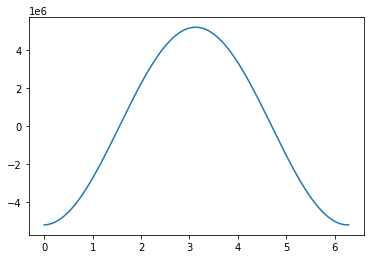

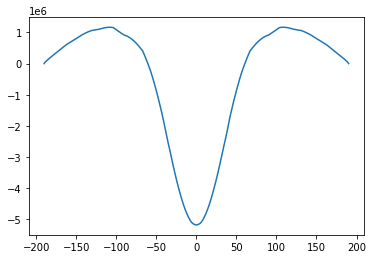

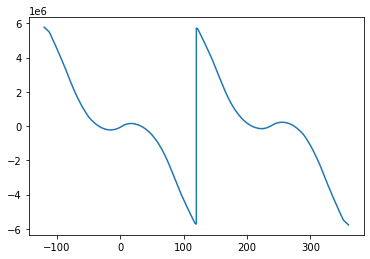

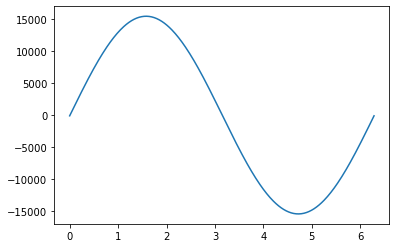

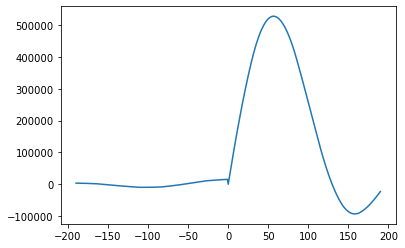

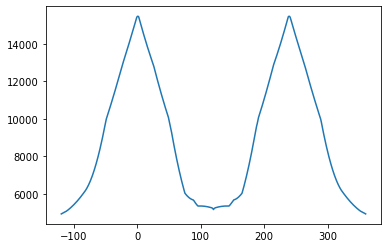

In [ ]:
showModePlot(result_dir,22)

In [ ]:
def real_ys(resultdir):
    rd=pathlib.Path(result_dir)
    re_path=rd.joinpath("TRUE.txt")
    fp=open(re_path,"r")
    lines=[]
    y_list=[]
    lines=fp.readlines()
    for line in lines:
        words=line.split()
        #print(words)
        if len(words)!=5:
            continue
        ml=list()
        ml.append(int(words[0]))
        ml.append(words[1])
        ml.append(int(words[2]))
        ml.append(int(words[3]))
        ml.append(int(words[4]))
        y_list.append(ml)
    return y_list

def predict_ys(resultdir,totalmodes):
    py_list=[]
    for i in range(1,totalmodes+1):
        py_list.append(mode_type_final(result_dir,i))
    return py_list
    
def valis(resultdir,totalmodes):
    y_list=real_ys(resultdir)
    py_list=predict_ys(resultdir,totalmodes)
    for i in range(totalmodes):
        flag=False        
        if y_list[i][1]!=py_list[i][1]:
            print("TYPE",end=" ")
            flag=True
        if y_list[i][2]!=py_list[i][2]:
            flag=True
            print("M", end=" ")
        if y_list[i][3]!=py_list[i][3]:
            flag=True
            print("N", end=" ")
        if y_list[i][4]!=py_list[i][4]:
            flag=True
            print("P", end=" ")
        if flag==True:
            print("MISMATCH!",y_list[i],py_list[i])




In [ ]:
valis(result_dir,10)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\172.1.10.232\\pillref_30_result\\R_190_L_230\\TRUE.txt'